In [16]:
from statistics import mean, median
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import timeit

# input_x is sinle data point
def single_perceptron(input_x, w):
    sigma = 0
    for i in range(len(input_x)-1):
        sigma += float(input_x[i])*w[i]
    # we put the bias at the end of w vector
    sigma += w[len(w)-1]
    if sigma >= 0:
        return '4'
    else:
        return '2'
    print("shouldn't be here")
    return '0'

# for a given training data (x and label y), we return a weight
def train_perceptron(input_x, output_y, w_init):
    w = w_init
    total_error = len(input_x)
    # print(total_error)
    k = 0
    # stop when no total error count or 300 loop
    # initialize as the length of trainging data (all wrong)
    while total_error != 0 and k<=300:
        # print("===========total error:",total_error,"===========")
        k += 1
        # print(k,"th iteraotr")
        # print(w)
        total_error = 0
        # go through every data point and adjust the weight
        for i in range(len(input_x)):
            y_pred = single_perceptron(input_x[i], w)
            if y_pred == '4' and output_y[i][9] == '2': # y-y' < 0
                error = -1
                total_error += 1
            #tmp_error += -1
            elif y_pred == '2' and output_y[i][9] == '4': # y-y' > 0
                error = 1
                total_error += 1
            #tmp_error += 1
            elif y_pred == '2' and output_y[i][9] == '2': # y-y' = 0
                error = 0
            elif y_pred == '4' and output_y[i][9] == '4': # y-y' = 0
                error = 0
            else:
                print("in perceptron, error calculate unexpected")
            for j in range(len(w)-1):
                w[j] += 0.1*error*float(input_x[i][j])
        # next while loop if there is still error
    #print("===========total error:",total_error,"===========")
    #print(k,"th iteraotr")
    #print(w)
    return w

# expect input_x is a single data point
# return label according to weight vector
def classify_perceptron(input_x, w):
    return single_perceptron(input_x, w)

# expect testing_data is a set of data point, w in a vector
# return accuracy, sensitivity, and specitivity in the input parameter
def Cross_validation_perceptron(testing_data, accuracy, sensitivity, specitivity, w):
    # print("size of testing data=",len(testing_data))
    # take class 2 as positive and class 4 as negative
    positive_acc = 0;
    negative_acc = 0;
    positive_all = 0;
    negative_all = 0;

    correct = 0;
    positive_all = 0;
    negative_all = 0;
    positive_acc = 0;
    negative_acc = 0;
    for i in range(len(testing_data)):
        y_pred = classify_perceptron(testing_data[i], w)
        if y_pred == '2' and testing_data[i][9] == '4': # label positive, we predice as negative
            negative_all += 1
        elif y_pred == '4' and testing_data[i][9] == '2': # label negative, we predice as positive
            positive_all += 1
        elif y_pred == '2' and testing_data[i][9] == '2': # label negative, we predice as negative
            positive_acc += 1
            positive_all += 1
        elif y_pred == '4' and testing_data[i][9] == '4': # label positive, we predice as positive
            negative_acc += 1
            negative_all += 1
        else:
            print("statistic y_pred, something wrong")
    accuracy.append((positive_acc+negative_acc)/len(testing_data))
    sensitivity.append(positive_acc/positive_all)
    specitivity.append(negative_acc/negative_all)

    return


fp = open('breast-cancer-wisconsin.data', "r")
index_of_arrtibute = 10
attr_target_list =[]
# this aim to store the average for each attribute, for '?' value
dist = [0]*index_of_arrtibute
#list_of_attribute = [[]] * 9
#print("len of lol=",len(list_of_attribute))

i=0
while True:
    data = fp.readline().split(',')
    if data[0] == '\n' or data[0] == '':break
    #if data[4] == Class_name: #Iris-setosa/ Iris-versicolor/ Iris-virginica/
    # print (i,":",data[10])
    i+=1
    #attr_target_list.append(float(data[index_of_arrtibute]))
    context = data[1:10]
    context.append(data[10][0])
    if ('?' in context):
        attr_target_list.append(context)
        #print("?")
    else:
        attr_target_list.append(context)
    # sum the attribute value
    for j in range(index_of_arrtibute):
        if context[j] != '?':
            dist[j] += float(context[j])
#end of read file

# auto fill in '?'
dist[:] = [ int(x/len(attr_target_list)) for x in dist]
for i in range(len(attr_target_list)):
    for j in range(len(attr_target_list[0])):
        if attr_target_list[i][j] == '?':
            attr_target_list[i][j] = dist[j]

#print(attr_target_list)
print("size of data point:",len(attr_target_list))
print("size of attribute:",len(attr_target_list[0]))

random.shuffle(attr_target_list)


size of data point: 699
size of attribute: 10


In [17]:
# for zero initialize
accuracy0 = []
sensitivity0 = []
specitivity0 = []
# for random initialize
accuracyRandom = []
sensitivityRandom = []
specitivityRandom = []

total_size = len(attr_target_list)
print("Zero initial:")
for i in range(10):# 10-fold
    print(i," testing data:[",int(total_size*i/10),",",int(total_size*(i+1)/10),"]")
    testing_data = attr_target_list[int(total_size*i/10):int(total_size*(i+1)/10)]
    training_data = attr_target_list[0:int(total_size*i/10)]
    training_data.extend(attr_target_list[int(total_size*(i+1)/10):])
    #Training
    w_init = [0]*(len(attr_target_list[0]))
    print("starting training...")
    w = train_perceptron(training_data, training_data, w_init)
    #testing
    print("starting testing...")
    Cross_validation_perceptron(testing_data, accuracy0, sensitivity0, specitivity0, w)
# just record this, print in the end
w_zero = w

print("Random initial:")
for i in range(10):# 10-fold
    print(i," testing data:[",int(total_size*i/10),",",int(total_size*(i+1)/10),"]")
    testing_data = attr_target_list[int(total_size*i/10):int(total_size*(i+1)/10)]
    training_data = attr_target_list[0:int(total_size*i/10)]
    training_data.extend(attr_target_list[int(total_size*(i+1)/10):])
    #Training
    print("starting training/ testing...")
    for j in range(10):
        w_init = [random.randint(0,10) for r in range(10)]
        w = train_perceptron(training_data, training_data, w_init)
        #testing
        Cross_validation_perceptron(testing_data, accuracyRandom, sensitivityRandom, specitivityRandom, w)
# just record this, print in the end
w_random = w

Zero initial:
0  testing data:[ 0 , 69 ]
starting training...
starting testing...
1  testing data:[ 69 , 139 ]
starting training...
starting testing...
2  testing data:[ 139 , 209 ]
starting training...
starting testing...
3  testing data:[ 209 , 279 ]
starting training...
starting testing...
4  testing data:[ 279 , 349 ]
starting training...
starting testing...
5  testing data:[ 349 , 419 ]
starting training...
starting testing...
6  testing data:[ 419 , 489 ]
starting training...
starting testing...
7  testing data:[ 489 , 559 ]
starting training...
starting testing...
8  testing data:[ 559 , 629 ]
starting training...
starting testing...
9  testing data:[ 629 , 699 ]
starting training...
starting testing...
Random initial:
0  testing data:[ 0 , 69 ]
starting training/ testing...
1  testing data:[ 69 , 139 ]
starting training/ testing...
2  testing data:[ 139 , 209 ]
starting training/ testing...
3  testing data:[ 209 , 279 ]
starting training/ testing...
4  testing data:[ 279 , 349 

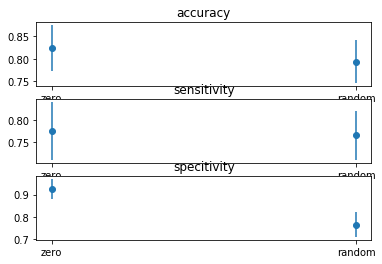

zero init:
accrracy= 0.824120082815735 sd= 0.05053085475866054
sensitivity= 0.7756984831997207 sd= 0.06386467513414258
specitivity= 0.9245148686139868 sd= 0.046200535234557985
random init:
accrracy= 0.7931677018633541 sd= 0.047784078061173844
sensitivity= 0.7653032611143774 sd= 0.054814808286400195
specitivity= 0.8492138315963476 sd= 0.08502716887183513


In [18]:
'''
print(accuracy0,"size=",len(accuracy0))
print(sensitivity0,"size=",len(sensitivity0))
print(specitivity0,"size=",len(specitivity0))

print(accuracyRandom,"size=",len(accuracyRandom))
print(sensitivityRandom,"size=",len(sensitivityRandom))
print(specitivityRandom,"size=",len(specitivityRandom))
'''

labels=['zero','random']

ax = plt.subplot(3, 1, 1)
ax.set_title("accuracy")
df = pd.DataFrame({'name':['zero', 'random'], 'assess':[mean(accuracy0),mean(accuracyRandom)]})
plt.errorbar(range(len(df['name'])), df['assess'], yerr=[np.std(accuracy0),np.std(accuracyRandom)], fmt='o')
plt.xticks(range(len(df['name'])), df['name'])

ax = plt.subplot(3, 1, 2)
ax.set_title("sensitivity")
df = pd.DataFrame({'name':['zero', 'random'], 'assess':[mean(sensitivity0),mean(sensitivityRandom)]})
plt.errorbar(range(len(df['name'])), df['assess'], yerr=[np.std(sensitivity0),np.std(sensitivityRandom)], fmt='o')
plt.xticks(range(len(df['name'])), df['name'])

ax = plt.subplot(3, 1, 3)
ax.set_title("specitivity")
df = pd.DataFrame({'name':['zero', 'random'], 'assess':[mean(specitivity0),mean(sensitivityRandom)]})
plt.errorbar(range(len(df['name'])), df['assess'], yerr=[np.std(specitivity0),np.std(sensitivityRandom)], fmt='o')
plt.xticks(range(len(df['name'])), df['name'])
plt.show()

print("zero init:")
print("accrracy=",mean(accuracy0),"sd=",np.std(accuracy0))
print("sensitivity=",mean(sensitivity0),"sd=",np.std(sensitivity0))
print("specitivity=",mean(specitivity0),"sd=",np.std(specitivity0))
print("random init:")
print("accrracy=",mean(accuracyRandom),"sd=",np.std(accuracyRandom))
print("sensitivity=",mean(sensitivityRandom),"sd=",np.std(sensitivityRandom))
print("specitivity=",mean(specitivityRandom),"sd=",np.std(specitivityRandom))
